Este trabalho foi realizado no âmbito da Unidade Currricular de **Complementos de Estatística para Ciência de Dados**.

Identificação do **Grupo Número 6**: 

| Nome              | Número      |
|-------------------|-------------|
| Bernardo Silva    | 2020112296 |
| Nuno Gonçalves    | 2015063961 |
| Simão Dias        | 2020132169 |


Com o acompanhamento do Professor Francisco José Nibau Antunes.

**Fonte dos dados:** https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction/data

**Contexto:** O conjunto de dados, obtidos através do *IMBd*, dizem respeito aos principais filmes e séries da *Netflix*. Estes dados, permitem construir sistemas de recomendação ou modelos para prever géneros.

Este conjunto de dados cativou-nos uma vez que é bastante interessante, oferecendo uma visão detalhada sobre os filmes e séries disponíveis na *Netflix*, onde abrange diferentes géneros e características.

**Conteúdo:**
O *dataset* é composto por 9 variáveis e um total de 9999 registos, o que permite uma análise robusta e diversificada. As variáveis são as seguintes:

* `MOVIES` - O título do filme ou série;
* `YEAR` - O ano de lançamento;
* `GENRE` - A categorização por género;
* `RATING` - A avaliação dada pelo público;
* `ONE-LINE` - Uma breve descrição destinada a causar a primeira impressão no público;
* `STARS` - O nome do Diretor do filme e dos membros do elenco, que frequentemente geram discussões e impacto no público;
* `VOTES` - A quantidade de votos e opiniões do público, úteis para medir o impacto do conteúdo;
* `RunTime` - A duração total do filme ou série;
* `Gross` - A receita total gerada a nível mundial.


**OBJETIVO:**

A escolha deste *dataset* justifica-se pelo interesse em explorar dados relacionados com uma das plataformas de *streaming* mais populares do mundo, analisando como diferentes fatores podem influenciar a popularidade e o sucesso dos conteúdos disponíveis. Além disso, a diversidade das variáveis proporciona uma oportunidade de aplicar técnicas analíticas variadas, o que torna o trabalho mais completo e enriquecedor.

## 1. Preâmbulo e Importação de dados

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importação dos dados

In [87]:
df = pd.read_csv("movies.csv")

## 3. Primeira inspeção dos dados, correção de formatos e início da limpeza

In [89]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


**Comentários:**

*  **Problemas identificados por coluna de `df`:**
1. Existem diversas variáveis com valores nulos, tais como: `RATING`, `VOTES`, `RunTime`, `Gross`;
2. A variável `STARS` contém dois nomes, o diretor e o ator/atriz com mais impacto do filme/série;
3. A variável `MOVIES` aparenta ter valores duplicados;
4. `ONE-LINE` quando não existe descrição do filme/série apresenta "*Add a Plot*".

* **Problemas identificados por coluna de `df.info`:**
1. Conseguimos observar que existem vários valores nulos no *dataset*, posteriormente, vamos observar a sua relevância e medidas a tomar para ultrapassarmos o problema;
Este problema ocorre nas colunas: `YEAR`, `GENRE`, `RATING`, `VOTES`, `RunTime`, `Gross`;
3. A variável `Gross` contém poucos valores, desta forma, podemos eliminar a coluna ou arranjar outra solução para o problema;
4. Existem variáveis numéricas que estão definidas como categóricas, nomeadamente, `YEAR`, `VOTES`, `Gross`.

* **Problemas identificados através do *Excel*:**
1. A partir do *Excel* conseguimos confirmar que existem valores duplicados na coluna `MOVIES`.
2. Observamos que a coluna `Gross` não pode ser transformada em numérica, isto porque contém letras no lado da receita numérica, como por exemplo, 45M. Precisamos de transformar 45M em 45000000, caso queiramos transformar a variável `Gross` em numérica. 

**Concluímos que existem os seguintes desafios a serem ultrapassados:**

* **Desafio 1:** Valores nulos;
* **Desafio 2:** Valores duplicados;
* **Desafio 3:** Variáveis com *Dtype* incorreto ou incoveniente para análise;
* **Desafio 4:** Variável `Gross` contém letras e aproximadamente 95% valores nulos;
* **Desafio 5:** A variável `ONE-LINE` contém "*Add a Plot*";
* **Desafio 6:** Variável `STARS` pode ser simplificada.

In [93]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


**Comentários:**

Ao utilizar `df.describe` podemos observar que só aparecem dados relativos a 2 colunas, onde ambas são numéricas (*float64*).

Existem outras colunas com carência desta observação, assim sendo, vamos prosseguir com outras observações e alterações de tipo, de forma a extinguir possíveis barreiras do nosso *dataset*.

## 4. Solução para os Desafios

### Desafio 1: Valores nulos

In [95]:
#Contagem de valores nulos
df.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [97]:
#Observação de percentagem de valores nulos
df.isna().sum() / df.shape[0] * 100

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

**Comentários:**

Existem vários valores nulos que precisam de ser corrigidos para darmos resposta ao **Desafio 1** e também ao **Desafio 5** relativamente à coluna `Gross`.

### Desafio 2: Valores duplicados

In [99]:
#Contagem duplicados
df.duplicated().sum()

431

In [101]:
df.duplicated().sum()/df.shape[0]*100

4.310431043104311

**Comentários:**

Numa fase inicial, foram detetadas **431 linhas duplicadas** que vão ter que ser removidas do *dataset*, isso representa **4,31%**.

### Desafio 3: Alteração de variáveis com tipo *String* para *Float*

In [103]:
df['YEAR'] = df['YEAR'].astype(str).str.extract(r'(\d{4})').astype(float)
df['VOTES'] = df['VOTES'].astype(str).str.replace(r',','').astype(float)

**Comentários:**

Para já, vamos realizar a mudança do *Dtype* das colunas `YEAR` e `VOTES`.

Conseguimos observar que a variável `YEAR` apresenta os anos de inínio e fim, no entanto, pretendemos considerar apenas o ano de início. Desta forma, vamos extrair apenas os primeiros quatro números de cada linha.

Relativamente à variável `VOTES`, decidimos retirar as vírgulas presentes.

### Desafio 4: Variável `Gross` contém letras

In [105]:
def convert_gross_value(value):
    if pd.isna(value):
        return value
    value = value.replace(',', '').replace('$', '')
    if 'M' in value:
        value = value.replace('M', '')
        value = float(value) * 1_000_000
        #Converter o M para número real
    elif 'K' in value:
        value = value.replace('K', '')
        value = float(value) * 1_000  
        #Converter o K para número real
    else:
        value = float(value)  
        #Converter a string para float
    return value

In [107]:
df['Gross'] = df['Gross'].apply(convert_gross_value)

**Comentários:**

Para resolvermos o problema da coluna `Gross` observado no *Excel*:
* Retirámos todos os caractéres especiais (nomeadamente "," e "$");
* Convertemos o M de Milhões para número real;
* Convertemos o K de milhares para número real;
* Convertemos de *string* para *float*.

### Solução Desafio 2: Valores duplicados (Parte I)

In [109]:
df['MOVIES'] = df['MOVIES'].str.strip()
df['GENRE'] = df['GENRE'].str.strip()
df['STARS'] = df['STARS'].str.strip()
df['ONE-LINE'] = df['ONE-LINE'].str.strip()

**Comentários:**

Para resolvermos o **Desafio 2: Valores duplicados**, será necessário removermos todos os espaços em branco no início e no final das *strings* contidas nas colunas do *DataFrame*, uma vez que verificámos que ao não tomarmos esta ação iriamos proceder com duplicados nos registos.

Assim sendo, numa fase inicial removemos todos os espaços desnecessários.

### Desafio 5: Limpeza na variável `ONE-LINE` 

In [111]:
# Substituir 'Add a Plot' por 'Não disponível'
df['ONE-LINE'] = df['ONE-LINE'].replace('Add a Plot', 'Não disponível')

# Remover caracteres especiais
df['ONE-LINE'] = df['ONE-LINE'].str.replace(r'[^\w\s]', '', regex=True)

**Comentários:**

Para manter a coluna `ONE-LINE` limpa, foi necessário substituir as linhas que continham "*Add a Plot*" por "*Não disponível*". Desta forma, para os filmes/séries que não têm uma descrição, será apresentado o valor "*Não disponível*".

Após este passo, removemos os caracteres especiais.

### Desafio 6: Variável `STARS` pode ser simplificada

De forma a simplificar a variável `STARS`, que, como observado, contém o diretor e os principais atores de cada filme/série, decidimos separá-la em duas.

Planeámos criar **duas novas variáveis**:
* `Director` (com o nome do diretor);
* `Stars` (com o nome dos atores).

In [113]:
#Passo I
def extract_info(text):
    director = None
    stars = None
    if 'Director:' in text:
        director = text.split('Director:\n')[1].split('\n|')[0].strip()
    if 'Stars:' in text:
        stars = text.split('Stars:\n')[1].strip()
    return director, stars

In [115]:
#Passo II
df[['Director', 'Stars']] = df['STARS'].apply(lambda x: pd.Series(extract_info(x)))

df.drop('STARS', axis=1, inplace=True)

In [117]:
#Passo III
#Limpeza de dados, se for vazio substituir por Desconhecido
df['Stars'] = df['Stars'].apply(lambda x: ' '.join(x.split()) if x and x != 'Desconhecido' else 'Desconhecido')

In [119]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021.0,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062.0,121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021.0,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870.0,25.0,NaN,None,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,NaN,None,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849.0,23.0,NaN,None,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021.0,"Action, Crime, Horror",NaN,A prequel set before the events of Army of the...,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021.0,"Adventure, Drama, Fantasy",NaN,Não disponível,NaN,NaN,NaN,None,"Morgan Taylor Campbell, Chris Cope, Iñaki Godo..."
9995,Arcane,2021.0,"Animation, Action, Adventure",NaN,Não disponível,NaN,NaN,NaN,None,Desconhecido
9996,Heart of Invictus,2022.0,"Documentary, Sport",NaN,Não disponível,NaN,NaN,NaN,Orlando von Einsiedel,Desconhecido
9997,The Imperfects,2021.0,"Adventure, Drama, Fantasy",NaN,Não disponível,NaN,NaN,NaN,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


**Comentários:**

Numa fase inicial (*Passo I*):

Foi necessário definir a função `extract_info`, que extraiu as informações dos **diretores** e das **estrelas (atores principais)** a partir do texto. Além disso, removemos todos os espaços desnecessários ao redor do texto com `strip()`.

*Passo II:*
* **Extração do Diretor:**
Se o texto contém a palavra "**Director**" extraímos e colocamos na nova coluna `Director`.
* **Extração das Estrelas:**
Se o texto contém a palavra "**Stars**" extraímos e colocamos na nova coluna `Stars`.

*Passo III:*

Após a criação das duas novas variáveis substituímos os valores vazios da variável `Stars` por "*Desconhecido*" e os espaços extras dentro das *strings* de cada entrada.

### Observação das variáveis

In [121]:
df.isna().sum()

MOVIES         0
YEAR         748
GENRE         80
RATING      1820
ONE-LINE       0
VOTES       1820
RunTime     2958
Gross       9539
Director    4643
Stars          0
dtype: int64

**Comentários:**

Observou-se que o número de anos aumentou com a mudança do tipo de variável, o que seria expectável.

In [123]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

print("Colunas numéricas:", num_cols)
print()
print("Colunas Categóricas:", cat_cols)

Colunas numéricas: Index(['YEAR', 'RATING', 'VOTES', 'RunTime', 'Gross'], dtype='object')

Colunas Categóricas: Index(['MOVIES', 'GENRE', 'ONE-LINE', 'Director', 'Stars'], dtype='object')


**Comentários:**

Além disso, indetificámos quais são as variáveis númericas e as categóricas.

### Desafio 1: Valores Nulos (Parte II)

Para ser realizada a **substituição de valores nulos**:

In [125]:
#Para resolver alguns avisos
def fill_with_median(series):
    if series.dropna().empty:
        return series
    else:
        return series.fillna(series.median())

df['YEAR'] = df.groupby('GENRE')['YEAR'].transform(fill_with_median)
df['GENRE'] = df['GENRE'].fillna(df['GENRE'].mode()[0])
df['RunTime'] = df.groupby(['GENRE', 'RATING'])['RunTime'].transform(fill_with_median)
df['Gross'] = df['Gross'].fillna(0)

df['Director'] = df['Director'].fillna('Desconhecido')

df['RATING'] = df.groupby(['GENRE', 'YEAR'])['RATING'].transform(fill_with_median)
df['VOTES'] = df.groupby(['GENRE', 'YEAR'])['VOTES'].transform(fill_with_median)

**Comentários:**

A função `fill_with_median(series)` permitiu preencher valores nulos com a **Mediana** dos restantes valores de cada coluna, assumindo a seguinte lógica:
Se a variável não tem valores válidos (após remover nulos), retorna a variável original sem modificações.
Caso contrário, preenche os valores ausentes com a mediana dos valores da variável.

Assim sendo, procedemos à alteração:
* Utilizámos a mediana nos valores nulos da variável `YEAR`, para isso, associámos a variável `GENRE`, desta forma, vamos preencher o ano de um filme/série com a **Mediana** do ano do género a que pertence.
* Na variável `RunTime` associámos as variáveis `GENRE` tal como fizemos no ano e `Rating`. Desta forma os valores nulos serão substituídos pela **Mediana** da duração dos filmes/séries daquele género e avaliação.
* Na variável `GENRE` preenchemos os valores nulos com a **Moda**.
* No `Gross` substituímos os valores nulos por **0**, se existirem filmes ou séries sem informações acerca da receita, assumimos que não houve receita ou não foi registada.

O facto da utilização da variável `GENRE` para promover estas alterações, prende-se pela sua representividade e relevância para a interpretação da análise. Assumimos que é uma variável de elevada importância, fazendo sentido promover as alterações consoante os 'valores' apresentados por esta variável.

Decidimos também substituir os valores nulos da variável `Director` para "*Desconhecido*", tal como fizemos na coluna `Stars`.

Com a função `df.groupby` decidimos agrupar o *DataFrame* pelas colunas `GENRE` e `YEAR` e, dentro de cada grupo, preenchemos os valores nulos nas colunas `RATING` e `VOTES` com a **Mediana**.

Após estas alterações, vamos fazer uma nova contagem dos nulos:

In [127]:
#Nova contagem de nulos após alterações
df.isna().sum()

MOVIES         0
YEAR          88
GENRE          0
RATING       472
ONE-LINE       0
VOTES        472
RunTime     2238
Gross          0
Director       0
Stars          0
dtype: int64

**Comentários:**

Já reduzimos bastante a dimensão do **"Desafio 1: Valores nulos"**, ainda assim, será necessário proceder à realização de mais alterações nas colunas restantes.

Decidimos utilizar a **Mediana** para extinguir os restantes valores nulos de cada variável.

In [129]:
df['RunTime'] = df['RunTime'].fillna(df['RunTime'].median())
df['YEAR'] = df['YEAR'].fillna(df['YEAR'].median())
df['RATING'] = df['RATING'].fillna(df['RATING'].median())
df['VOTES'] = df['VOTES'].fillna(df['VOTES'].median())

In [131]:
df.isna().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
VOTES       0
RunTime     0
Gross       0
Director    0
Stars       0
dtype: int64

**Comentários:**

Os **valores nulos** foram removidos com sucesso, sem precisarmos de eliminar linhas do nosso *Dataset*.
**Desafio 1 resolvido**.

### Desafio 3: Variáveis com *Dtype* incorreto (Parte II)

In [133]:
df = df.copy()
df['YEAR'] = df['YEAR'].astype(int)
df['RunTime'] = df['RunTime'].astype(int)
df['VOTES'] = df['VOTES'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9999 non-null   int32  
 2   GENRE     9999 non-null   object 
 3   RATING    9999 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   VOTES     9999 non-null   int32  
 6   RunTime   9999 non-null   int32  
 7   Gross     9999 non-null   float64
 8   Director  9999 non-null   object 
 9   Stars     9999 non-null   object 
dtypes: float64(2), int32(3), object(5)
memory usage: 664.1+ KB


**Comentários:**

Para facilitar a análise dos dados realizámos a mudança do tipo de dados das variáveis: `YEAR` , `RunTime` e `VOTES`.

In [135]:
df = df.drop_duplicates()

In [137]:
df.duplicated().sum()

0

In [139]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121,0.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25,0.0,Desconhecido,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44,0.0,Desconhecido,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23,0.0,Desconhecido,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",5.8,A prequel set before the events of Army of the...,132378,60,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",7.1,Não disponível,716,60,0.0,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro..."
9995,Arcane,2021,"Animation, Action, Adventure",7.1,Não disponível,196,60,0.0,Desconhecido,Desconhecido
9996,Heart of Invictus,2022,"Documentary, Sport",7.1,Não disponível,716,60,0.0,Orlando von Einsiedel,Desconhecido
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",7.1,Não disponível,716,60,0.0,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


**Comentários:**

Após a primeira `df.duplicated` conseguimos observa que o *output* apresentou 0 valores duplicados, no entanto, conseguimos concluir que na coluna `MOVIES` ainda existem repetições pelo facto de existirem diferenças residuais entre linhas que dizem respeito ao mesmo filme.

Assumindo que esta coluna tem que conter valores únicos e, devido à sua relevância, vamos proceder a uma limpeza específica para esta coluna.

In [141]:
df = df.drop_duplicates("MOVIES")

In [143]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121,0.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25,0.0,Desconhecido,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44,0.0,Desconhecido,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23,0.0,Desconhecido,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",5.8,A prequel set before the events of Army of the...,132378,60,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...,...,...
9304,Son of Abish,2014,"Comedy, Talk-Show",7.1,On this episode catch Abhishek Bachchan and In...,716,60,0.0,Desconhecido,"Abish Mathew, Abhishek Bachchan, Inayat Verma,..."
9314,Dad Stop Embarrassing Me,2021,"Comedy, Family",5.7,After Sasha moves in with Brian a mortifying m...,98,58,0.0,Ken Whittingham,"Jamie Foxx, David Alan Grier, Kyla-Drew, Porsc..."
9463,The Talk,2010,Talk-Show,7.1,Actor Ralph Macchio Cobra Kai 2018,716,60,0.0,Desconhecido,"Sharon Osbourne, Sheryl Underwood, Carrie Ann ..."
9543,Kajko i Kokosz,2021,"Animation, Action, Adventure",7.1,Não disponível,34,24,0.0,Michal Sledzinski,"Artur Pontek, Michal Piela, Maciej Kosmala, Ja..."


**Comentários:**

Como verificámos existem apenas **6423 filmes** (registos únicos).

## 5. Remover Outliers

Embora tenhamos optado por substituir os valores pela mediana, decidimos continuar com a remoção dos *Outliers* mesmo sabendo que não interfere com o valor da mediana.

Para deixarmos o *DataSet* limpo será necessário proceder à remoção de *outliers*.

Assim sendo, procedemos às seguintes operações:
* Calcular o **Quartil 1** (*Q1*) e o **Quartil 3** (*Q3*);
* Calcular o **Intervalo Interquartil** (*IQR*), ou seja, a diferença entre *Q3* e *Q1*;
* Calcular o **limite inferior** (*Lower bound*) e o **limite superior** (*Upper bound*).

In [145]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

cols = ['VOTES', 'RunTime']

for column in cols:
    df = remove_outliers(df, column)

**Comentários:**

Após os cálculos mencionados anteriormente, foi necessário efetuar uma **filtragem dos dados** através da função `filtered_df` que contém as linhas definidas dentro dos limites (superior e inferior).

Depois da filtragem prosseguimos com a **remoção dos outliers**.

In [147]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121,0.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25,0.0,Desconhecido,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
6,The Last Letter from Your Lover,2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,5283,110,0.0,Augustine Frizzell,"Shailene Woodley, Joe Alwyn, Wendy Nottingham,..."
10,Gunpowder Milkshake,2021,"Action, Adventure, Thriller",6.0,Three generations of women fight back against ...,17989,114,0.0,Navot Papushado,"Karen Gillan, Lena Headey, Carla Gugino, Miche..."
13,Sex/Life,2021,"Comedy, Drama, Romance",5.4,A suburban mother of two takes a fantasycharge...,12172,94,0.0,Desconhecido,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ..."
...,...,...,...,...,...,...,...,...,...,...
9304,Son of Abish,2014,"Comedy, Talk-Show",7.1,On this episode catch Abhishek Bachchan and In...,716,60,0.0,Desconhecido,"Abish Mathew, Abhishek Bachchan, Inayat Verma,..."
9314,Dad Stop Embarrassing Me,2021,"Comedy, Family",5.7,After Sasha moves in with Brian a mortifying m...,98,58,0.0,Ken Whittingham,"Jamie Foxx, David Alan Grier, Kyla-Drew, Porsc..."
9463,The Talk,2010,Talk-Show,7.1,Actor Ralph Macchio Cobra Kai 2018,716,60,0.0,Desconhecido,"Sharon Osbourne, Sheryl Underwood, Carrie Ann ..."
9543,Kajko i Kokosz,2021,"Animation, Action, Adventure",7.1,Não disponível,34,24,0.0,Michal Sledzinski,"Artur Pontek, Michal Piela, Maciej Kosmala, Ja..."


**Comentários:**

Como podemos observar o número de registos únicos foram reduzidos de **6423 para 5533**, consolidando, desta forma, os nossos dados.

## 6. Resumo Estatístico

In [149]:
# descrição estatística das colunas
df.describe(include='all').round(2)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
count,5533,5533.00,5533,5533.00,5533,5533.00,5533.00,5533.00,5533,5533
unique,5533,NaN,483,NaN,5236,NaN,NaN,NaN,2232,4545
top,Blood Red Sky,NaN,Comedy,NaN,Não disponível,NaN,NaN,NaN,Desconhecido,Desconhecido
freq,1,NaN,714,NaN,280,NaN,NaN,NaN,2831,956
mean,NaN,2016.09,NaN,6.55,NaN,2689.14,71.05,87677.57,NaN,NaN
std,NaN,7.27,NaN,1.16,NaN,4228.77,30.74,1525732.67,NaN,NaN
min,NaN,1932.00,NaN,1.80,NaN,5.00,1.00,0.00,NaN,NaN
25%,NaN,2015.00,NaN,5.90,NaN,294.00,55.00,0.00,NaN,NaN
50%,NaN,2018.00,NaN,6.80,NaN,833.00,61.00,0.00,NaN,NaN
75%,NaN,2019.00,NaN,7.30,NaN,2934.00,93.00,0.00,NaN,NaN


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 0 to 9602
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    5533 non-null   object 
 1   YEAR      5533 non-null   int32  
 2   GENRE     5533 non-null   object 
 3   RATING    5533 non-null   float64
 4   ONE-LINE  5533 non-null   object 
 5   VOTES     5533 non-null   int32  
 6   RunTime   5533 non-null   int32  
 7   Gross     5533 non-null   float64
 8   Director  5533 non-null   object 
 9   Stars     5533 non-null   object 
dtypes: float64(2), int32(3), object(5)
memory usage: 410.7+ KB


In [153]:
# apenas variáveis numéricas
(df
 .filter(['YEAR','RATING','VOTES','RunTime','Gross'])
 .describe(percentiles=[.01, .25, .5, .75, .99])
 .round(2))

,YEAR,RATING,VOTES,RunTime,Gross
count,5533.00,5533.00,5533.00,5533.00,5533.00
mean,2016.09,6.55,2689.14,71.05,87677.57
std,7.27,1.16,4228.77,30.74,1525732.67
min,1932.00,1.80,5.00,1.00,0.00
1%,1982.32,3.30,11.00,11.00,0.00
25%,2015.00,5.90,294.00,55.00,0.00
50%,2018.00,6.80,833.00,61.00,0.00
75%,2019.00,7.30,2934.00,93.00,0.00
99%,2022.00,8.60,19912.12,151.68,467200.00
max,2023.00,9.40,22971.00,205.00,49770000.00


In [155]:
# apenas variáveis categóricas (que vão ser analisadas como tal)
(df
 .filter(['MOVIES','GENRE','ONE-LINE','Director','Stars'])
 .astype('object')
 .describe()
 )

,MOVIES,GENRE,ONE-LINE,Director,Stars
count,5533,5533,5533,5533,5533
unique,5533,483,5236,2232,4545
top,Blood Red Sky,Comedy,Não disponível,Desconhecido,Desconhecido
freq,1,714,280,2831,956


In [157]:
data_dict = pd.DataFrame({
    'Column': df.columns,  # Nome das colunas
    'DataType': [df[col].dtype for col in df.columns],  # Tipo de dado
    'NonNullCount': df.notnull().sum().values,  # Contagem de valores não nulos
    'MissingValues': df.isnull().sum().values,  # Contagem de valores nulos
    'UniqueValues': [df[col].nunique() for col in df.columns],  # Contagem de valores únicos
    'Example': [df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A" for col in df.columns],  # Exemplo de valor
})

# Exibe o conteúdo do DataFrame 'data_dict'
data_dict

,Column,DataType,NonNullCount,MissingValues,UniqueValues,Example
0,MOVIES,object,5533,0,5533,Blood Red Sky
1,YEAR,int32,5533,0,70,2021
2,GENRE,object,5533,0,483,"Action, Horror, Thriller"
3,RATING,float64,5533,0,102,6.1
4,ONE-LINE,object,5533,0,5236,A woman with a mysterious illness is forced in...
5,VOTES,int32,5533,0,2936,21062
6,RunTime,int32,5533,0,182,121
7,Gross,float64,5533,0,85,0.0
8,Director,object,5533,0,2232,Peter Thorwarth
9,Stars,object,5533,0,4545,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."


<Axes: >

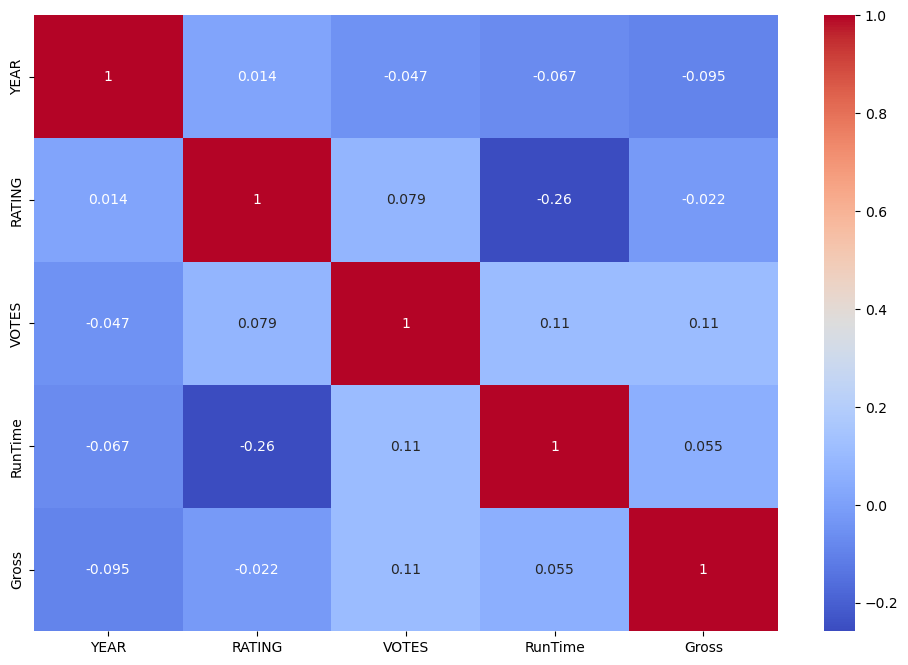

In [159]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

**Comentários:**

Mais uma vez, identificámos as colunas numéricas e categóricas, armazenando-as respetivamente, em `num_cols` e `cat_cols`. 

Através de `corr = df[num_cols].corr()`, calculámos a matriz de correlação entre as colunas numéricas. A correlação mede a relação linear entre duas variáveis, com valores que variam de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita), sendo 0 indicativo de ausência de relação linear.

Decidimos criar um mapa de calor com `sns.heatmap(corr, cmap='coolwarm', annot=True)` para visualizar a matriz de correlação, utilizando a paleta de cores *coolwarm* para distinguir valores altos (próximos de 1) de valores baixos (próximos de -1). O argumento `annot=True` adiciona os valores das correlações como texto dentro das células do gráfico, permitindo uma visualização clara e objetiva.

A finalidade deste passo é compreender as **relações entre as variáveis numéricas**, o que pode ser útil para:
* Identificar quais variáveis estão fortemente relacionadas (positiva ou negativamente).
* Detectar possíveis colinearidades (quando duas ou mais variáveis estão altamente correlacionadas).
* Orientar análises exploratórias ou a seleção de variáveis para modelos de *machine learning*.

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'RATING'}>],
       [<Axes: title={'center': 'VOTES'}>,
        <Axes: title={'center': 'RunTime'}>],
       [<Axes: title={'center': 'Gross'}>, <Axes: >]], dtype=object)

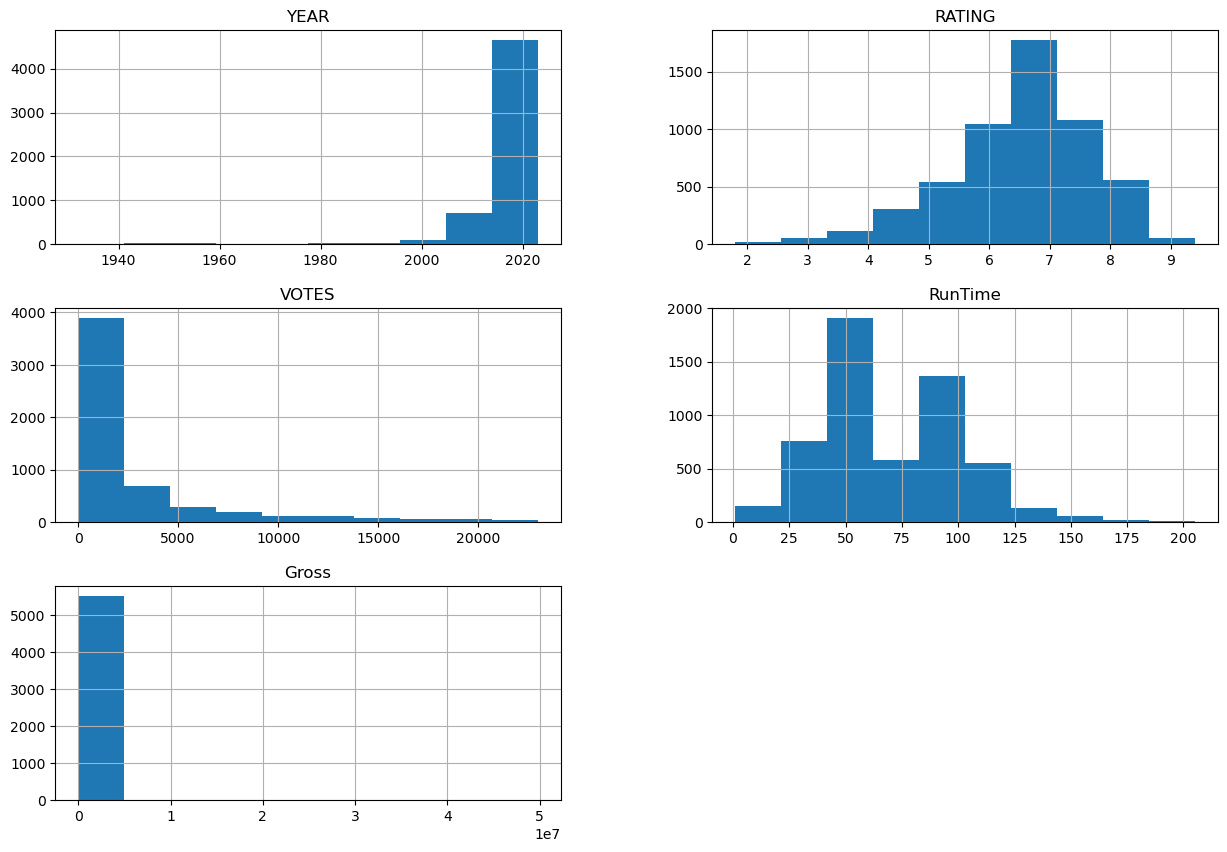

In [161]:
df.hist(figsize=(15, 10))

**Comentários:**

Decidimos visualizar quantas categorias únicas existem em cada coluna categórica.
Acreditamos ser útil para entender a diversidade das variáveis categóricas e planear análises posteriores, como codificação para *machine learning* (ex.: *one-hot encoding*).

Visualizar a distribuição das variáveis numéricas permite:
* Identificar padrões como simetria, dispersão ou picos.
* Verificar presença de *outliers* ou dados concentrados em certos intervalos.
* Avaliar se os dados seguem uma distribuição específica, como a normal.

### **Resumo**
* Na totalidade, e por diversas razões e análises, 4466 registos (~44,66%) foram removidos.
* Todas as correções obrigatórias de formato das colunas (i.e., variáveis) foram feitas.
* Existe outra questão de qualidade levantadas na primeira inspeção, que obrigam a uma inspeção mais detalhada, relativamente à nossa escolha em deixar permanecer a variável `Gross` no *dataset*.

### **Inspeção detalhada da coluna `Gross`**

#### Problema: `Gross` igual a 0.0

#####   **Será que se consegue associar este problema a alguma das outras variáveis?**

In [163]:
# apenas as linhas com Gross igual a 0.0
df.query('Gross == 0.0').describe(include='all')

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
count,5371,5371.000000,5371,5371.000000,5371,5371.000000,5371.000000,5371.0,5371,5371
unique,5371,NaN,477,NaN,5074,NaN,NaN,NaN,2124,4387
top,Blood Red Sky,NaN,Comedy,NaN,Não disponível,NaN,NaN,NaN,Desconhecido,Desconhecido
freq,1,NaN,713,NaN,280,NaN,NaN,NaN,2805,952
mean,NaN,2016.235710,NaN,6.555046,NaN,2573.861292,70.265872,0.0,NaN,NaN
std,NaN,7.088291,NaN,1.164958,NaN,4109.689633,30.736310,0.0,NaN,NaN
min,NaN,1932.000000,NaN,1.800000,NaN,5.000000,1.000000,0.0,NaN,NaN
25%,NaN,2015.000000,NaN,5.900000,NaN,291.000000,53.000000,0.0,NaN,NaN
50%,NaN,2018.000000,NaN,6.800000,NaN,797.000000,60.000000,0.0,NaN,NaN
75%,NaN,2019.000000,NaN,7.300000,NaN,2772.500000,92.000000,0.0,NaN,NaN


In [165]:
# todas as linhas
df.describe(include='all')

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
count,5533,5533.000000,5533,5533.000000,5533,5533.000000,5533.000000,5.533000e+03,5533,5533
unique,5533,NaN,483,NaN,5236,NaN,NaN,NaN,2232,4545
top,Blood Red Sky,NaN,Comedy,NaN,Não disponível,NaN,NaN,NaN,Desconhecido,Desconhecido
freq,1,NaN,714,NaN,280,NaN,NaN,NaN,2831,956
mean,NaN,2016.088198,NaN,6.553054,NaN,2689.143322,71.051690,8.767757e+04,NaN,NaN
std,NaN,7.274409,NaN,1.158527,NaN,4228.773547,30.736739,1.525733e+06,NaN,NaN
min,NaN,1932.000000,NaN,1.800000,NaN,5.000000,1.000000,0.000000e+00,NaN,NaN
25%,NaN,2015.000000,NaN,5.900000,NaN,294.000000,55.000000,0.000000e+00,NaN,NaN
50%,NaN,2018.000000,NaN,6.800000,NaN,833.000000,61.000000,0.000000e+00,NaN,NaN
75%,NaN,2019.000000,NaN,7.300000,NaN,2934.000000,93.000000,0.000000e+00,NaN,NaN


**Comentários**

Comparando as medidas resumo de `MOVIES`, `YEAR`, `RATING`, `VOTES` e `RunTime` da tabela completa com a tabela em que `Gross` == 0.0, **não se consegue vislumbrar qualquer motivo para a ocorrência do 0.0**. Aparenta ser um problema de falta de informação, não estando correlacionado com nenhuma das outras variáveis.

Assumimos que o motivo da falha parece ser **MCAR (Missing Completely At Random)**.

#####   **Assumindo que cada registo da variável `Gross` está associada a apenas um *Movie*, será possível recuperar o `Gross` usando o `Rating`?**

In [167]:
(df
 .filter(['RATING','Gross'])
 .groupby(['RATING'])
 .nunique('Gross')
 .describe()
 )

,Gross
count,102.000000
mean,2.470588
std,2.520042
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,12.000000


**Comentários:**

Uma vez que **max > 1**, não é possível recuperar `Gross` exclusivamente a partir de `RATING`.

Existe uma relação de **muitos-para-um (1:N)** entre `Gross` e `RATING`. Isto significa que, para alguns valores de `RATING`, existem múltiplos valores de `Gross` possíveis, impossibilitando a recuperação única do `Gross`.

#### **Solução adotada**

Decidimos manter a variável `Gross`, uma vez que, apesar de não considerarmos a variável relevante para a análise, optámos por não a eliminar quando os seus valores são **iguais a 0**, pois isso reduziria drasticamente o volume do *dataset*.

## 7. Dicionário de Dados

In [169]:
# Adicionar novamente a coluna 'STARS' ao DataFrame
df['STARS'] = df['Director'] + ' & ' + df['Stars']  # Recriação da coluna, visto que os dados originais já não existem.

# Atualizar descrições
descriptions = {
    'MOVIES': 'Título do filme ou série',
    'YEAR': 'Ano de lançamento',
    'GENRE': 'Categorização por género',
    'RATING': 'Avaliação dada pelo público',
    'ONE-LINE': 'Descrição do filme ou série',
    'VOTES': 'Número de votos do público',
    'RunTime': 'Duração total do filme ou série',
    'Gross': 'Receita total gerada',
    'Director': 'Nome do diretor do filme ou série',
    'Stars': 'Nome dos principais atores',
    'STARS': 'Nome do diretor e principais atores'
}

# Função para identificar o tipo estatístico
def get_stat_type(column):
    if column.dtype == 'object':  # Strings são categóricas
        return 'categórica'
    elif column.dtype in ['int32', 'float64']:  # Números são numéricos
        return 'numérica'
    else:
        return 'desconhecido'

# Função para identificar a escala da variável
def get_scale(column):
    if column.dtype in ['int32', 'float64']:  # Tipos numéricos
        return 'rácio'
    elif column.dtype == 'object':  # Para variáveis categóricas
        return 'nominal'
    else:
        return 'desconhecido'

# Gerar a tabela automaticamente
data_dict = pd.DataFrame({
    'Nome': df.columns,  # Nome das colunas
    'Descrição': [descriptions.get(col, f'Descrição de {col}') for col in df.columns],  # Descrição fornecida ou padrão
    'Tipo (estatístico)': [get_stat_type(df[col]) for col in df.columns],  # Tipo estatístico
    'Escala (estatística)': [get_scale(df[col]) for col in df.columns],  # Escala da variável
    'Formato (em Python)': [df[col].dtype.name for col in df.columns],  # Tipo do formato em Python
    'Fórmula': ['N/A' for _ in df.columns]  # Fórmula (por enquanto, coloca 'N/A')
})

# Exibir a tabela
data_dict

,Nome,Descrição,Tipo (estatístico),Escala (estatística),Formato (em Python),Fórmula
0,MOVIES,Título do filme ou série,categórica,nominal,object,N/A
1,YEAR,Ano de lançamento,numérica,rácio,int32,N/A
2,GENRE,Categorização por género,categórica,nominal,object,N/A
3,RATING,Avaliação dada pelo público,numérica,rácio,float64,N/A
4,ONE-LINE,Descrição do filme ou série,categórica,nominal,object,N/A
5,VOTES,Número de votos do público,numérica,rácio,int32,N/A
6,RunTime,Duração total do filme ou série,numérica,rácio,int32,N/A
7,Gross,Receita total gerada,numérica,rácio,float64,N/A
8,Director,Nome do diretor do filme ou série,categórica,nominal,object,N/A
9,Stars,Nome dos principais atores,categórica,nominal,object,N/A


**Comentários:**

No quadro anterior, apresentámos o nosso **Dicionário de Dados**, que contém todas as variáveis representadas no nosso *dataset*, incluindo as que foram criadas e as que foram removidas.

Para tal, foi necessário adicionar novamente a variável `STARS` ao *DataFrame*. Após essa adição, procedemos à atualização das descrições das variáveis, adicionámos uma função para identificar o tipo estatístico de cada variável e gerámos a nossa tabela.

## 8. Síntese da Qualidade dos Dados por Dimensão

In [171]:
# Criar o DataFrame com as informações fornecidas
data_quality = pd.DataFrame({
    'Dimensão': [
        'Credibilidade', 'Conformidade', 'Redundância', 
        'Completude', 'Precisão', 'Consistência', 
        'Interpretabilidade', 'Atualidade'
    ],
    'Comentário': [
        ("Os dados foram retirados do Kaggle. A metainformação associada é apenas a descrição mínima das colunas, no entanto, sabe-se que a fonte original dos dados pertence à base de dados da IMBd. "
        "Desta forma, podemos coonfirmar a credibilidade dos dados apresentados, embora existam imperfeições e valores nulos. "),
        ("O conjunto inicial incluía 9999 linhas e 9 colunas. Após a limpeza e transformação, resultou em 5533 linhas e 10 colunas, indicando remoções e adições significativas. "
         "Novas colunas, como Director e Stars, foram incorporadas, enquanto outras foram reorganizadas. Não houve remoção de campos do original, no entanto, existiu a necessidade criar outros campos para melhor controlo dos dados. "
         "Essas alterações garantiram conformidade com os objetivos da análise final."),
        ("O dataset original apresentava registos duplicados, que foram completamente eliminados no conjunto final. "
         "Garantindo, desta forma, maior integridade nos futuros cálculos relacionados com métricas como receita (Gross) e popularidade (Votes). "
         "A limpeza reduziu duplicações para 0%. A alta redundância inicial foi tratada como prioritária no início da análise."),
        ("Inicialmente, 16.861 valores ausentes estavam distribuídos entre várias variáveis como Gross, RunTime e Director. "
         "Após o processo de limpeza, o número de registos foi reduzido para 5.533, eliminando registos com informações críticas ausentes. "
         "Alguns campos, como Gross (receita), receberam atenção especial, sendo preenchidos quando possível. "
         "No entanto, valores irreparáveis foram descartados, o que melhorou a complitude geral para análise posterior."),
        ("Foram corrigidos valores inconsistentes e inválidos em várias colunas. Por exemplo, entradas como 0 em Gross foram verificadas e ajustadas. "
         "Em RunTime, valores inválidos ou ausentes foram tratados, eliminando registos que não podiam ser corrigidos. "
         "Estas melhorias resultaram em maior precisão para as análises passíveis de ser feitas. "),
        ("Foram feitos ajustes para garantir consistência estrutural entre colunas relacionadas. "
         "Por exemplo, Stars e Director foram consolidadas com STARS, eliminando redundâncias. "),
        ("Melhorias substanciais foram feitas para aumentar a clareza dos dados. "
         "Colunas adicionais, como Director e Stars, enriquecem a análise e tornam o dataset mais informativo. "
         "A padronização de categorias e a limpeza de valores ambíguos na variável GENRE facilitam a interpretação. "
         "Entretanto, a ausência de metadados detalhados no conjunto inicial exigiu inferências, como suposições sobre significados de valores nulos em colunas críticas. Principalmente na variável GROSS"),
        ("Não é relevante neste contexto de exercício académico. Se fosse, estariam desatualizados, uma vez que o ultimo registo é de 2023." )
    ]
})  

In [ ]:
data_quality.to_excel('analise_qualidade.xlsx', index=False)

In [173]:
pd.set_option('display.max_colwidth', None)  # Permite mostrar todo o conteúdo da célula
pd.set_option('display.expand_frame_repr', False)  # Evita quebra horizontal da tabela

# Exibir o DataFrame novamente
display(data_quality)

,Dimensão,Comentário
0,Credibilidade,"Os dados foram retirados do Kaggle. A metainformação associada é apenas a descrição mínima das colunas, no entanto, sabe-se que a fonte original dos dados pertence à base de dados da IMBd. Desta forma, podemos coonfirmar a credibilidade dos dados apresentados, embora existam imperfeições e valores nulos."
1,Conformidade,"O conjunto inicial incluía 9999 linhas e 9 colunas. Após a limpeza e transformação, resultou em 5533 linhas e 10 colunas, indicando remoções e adições significativas. Novas colunas, como Director e Stars, foram incorporadas, enquanto outras foram reorganizadas. Não houve remoção de campos do original, no entanto, existiu a necessidade criar outros campos para melhor controlo dos dados. Essas alterações garantiram conformidade com os objetivos da análise final."
2,Redundância,"O dataset original apresentava registos duplicados, que foram completamente eliminados no conjunto final. Garantindo, desta forma, maior integridade nos futuros cálculos relacionados com métricas como receita (Gross) e popularidade (Votes). A limpeza reduziu duplicações para 0%. A alta redundância inicial foi tratada como prioritária no início da análise."
3,Completude,"Inicialmente, 16.861 valores ausentes estavam distribuídos entre várias variáveis como Gross, RunTime e Director. Após o processo de limpeza, o número de registos foi reduzido para 5.533, eliminando registos com informações críticas ausentes. Alguns campos, como Gross (receita), receberam atenção especial, sendo preenchidos quando possível. No entanto, valores irreparáveis foram descartados, o que melhorou a complitude geral para análise posterior."
4,Precisão,"Foram corrigidos valores inconsistentes e inválidos em várias colunas. Por exemplo, entradas como 0 em Gross foram verificadas e ajustadas. Em RunTime, valores inválidos ou ausentes foram tratados, eliminando registos que não podiam ser corrigidos. Estas melhorias resultaram em maior precisão para as análises passíveis de ser feitas."
5,Consistência,"Foram feitos ajustes para garantir consistência estrutural entre colunas relacionadas. Por exemplo, Stars e Director foram consolidadas com STARS, eliminando redundâncias."
6,Interpretabilidade,"Melhorias substanciais foram feitas para aumentar a clareza dos dados. Colunas adicionais, como Director e Stars, enriquecem a análise e tornam o dataset mais informativo. A padronização de categorias e a limpeza de valores ambíguos na variável GENRE facilitam a interpretação. Entretanto, a ausência de metadados detalhados no conjunto inicial exigiu inferências, como suposições sobre significados de valores nulos em colunas críticas. Principalmente na variável GROSS"
7,Atualidade,"Não é relevante neste contexto de exercício académico. Se fosse, estariam desatualizados, uma vez que o ultimo registo é de 2023."


* Tabela de dados original: **9999** linhas e 9 colunas.
* Tabela de dados depois da limpeza: **5533** e 10 colunas.

 * Assim, ficaram **55,33%** dos registos iniciais.

**Comentários:**

No quadro anterior, apresentámos a nossa **Síntese da Qualidade dos Dados por Dimensão**. Foi necessário criar cada uma das dimensões e adicionar os respetivos comentários.

## 9. Guardar o conjunto de dados com a limpeza feita

In [ ]:
df.to_csv('movies_data_revised.csv')

**Comentários:**

Por fim, decidimos guardar os dados atualizados e limpos em ficheiro *CSV*.